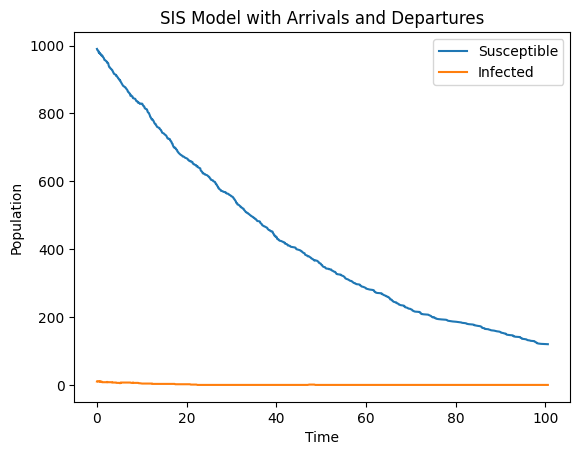

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_d = 0.02  # Departure rate
mu_a = 0.03  # Arrival rate
beta = 0.05  # Infection transmission rate
gamma = 0.1  # Recovery rate
m = 0.5  # Mean infection probability for arrivals
sigma = 0.1  # Variance in infection probability for arrivals
p = 0.5  # Edge generation probability
T = 100  # Total time
N = 1000  # Initial population size
I_init = 10  # Initial number of infected agents

# Initialize states
S = N - I_init
I = I_init
time_series = [(0, S, I)]

# Simulation
np.random.seed(42)
t = 0
while t < T:
    rates = [mu_d * (S + I), mu_a, beta * S * I / N, gamma * I]
    total_rate = sum(rates)
    
    # Time to next event
    delta_t = np.random.exponential(1 / total_rate)
    t += delta_t
    
    # Select event
    event = np.random.choice(['departure', 'arrival', 'infection', 'recovery'], p=np.array(rates) / total_rate)
    
    if event == 'departure' and (S + I) > 1:
        if np.random.rand() < I / (S + I):
            I -= 1
        else:
            S -= 1
            
    elif event == 'arrival':
        new_infection = np.random.rand() < np.random.normal(m, sigma)
        if new_infection:
            I += 1
        else:
            S += 1
    
    elif event == 'infection':
        I += 1
        S -= 1
        
    elif event == 'recovery':
        I -= 1
        S += 1
    
    # Update population size and infection counts
    time_series.append((t, S, I))

# Visualization
time_series = np.array(time_series)
plt.plot(time_series[:, 0], time_series[:, 1], label='Susceptible')
plt.plot(time_series[:, 0], time_series[:, 2], label='Infected')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIS Model with Arrivals and Departures')
plt.legend()
plt.show()

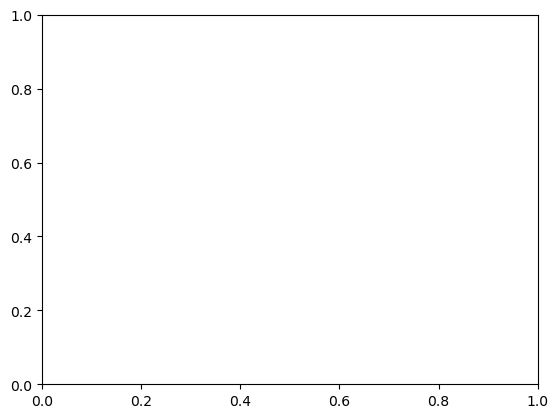

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
grid_size = 100  # Size of the grid
initial_infected = 100  # Initial number of infected individuals
infection_probability = 0.05  # Probability of infection from infected neighbor
recovery_probability = 0.01  # Probability of recovery for an infected individual
movement_probability = 0.1  # Probability of moving to an adjacent cell

# Grid codes
EMPTY = 0
SUSCEPTIBLE = 1
INFECTED = 2

# Initialize grid
np.random.seed(42)
grid = np.zeros((grid_size, grid_size), dtype=int)
# Populate the grid randomly with initial infected individuals
initial_infections = np.random.choice(range(grid_size*grid_size), initial_infected, replace=False)
grid.ravel()[initial_infections] = INFECTED
# Assume the rest are susceptible
grid[grid == 0] = SUSCEPTIBLE

# Define neighborhood for local interactions
neighbor_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Simulation step
def step(grid):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == INFECTED:
                # Attempt recovery
                if np.random.rand() < recovery_probability:
                    new_grid[i, j] = SUSCEPTIBLE
            elif grid[i, j] == SUSCEPTIBLE:
                # Check for infection
                for dx, dy in neighbor_offsets:
                    nx, ny = i + dx, j + dy
                    if 0 <= nx < grid_size and 0 <= ny < grid_size:
                        if grid[nx, ny] == INFECTED:
                            if np.random.rand() < infection_probability:
                                new_grid[i, j] = INFECTED
                                break
            
            # Movement
            if np.random.rand() < movement_probability:
                dx, dy = neighbor_offsets[np.random.randint(0, len(neighbor_offsets))]
                nx, ny = i + dx, j + dy
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    # Swap positions
                    new_grid[i, j], new_grid[nx, ny] = new_grid[nx, ny], new_grid[i, j]
    
    return new_grid

# Visualization using matplotlib animation
fig, ax = plt.subplots()

def update(*args):
    global grid
    grid = step(grid)
    ax.clear()
    ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
    ax.axis('off')

ani = animation.FuncAnimation(fig, update, frames=200, interval=50)
plt.show()

/home/sarahl/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


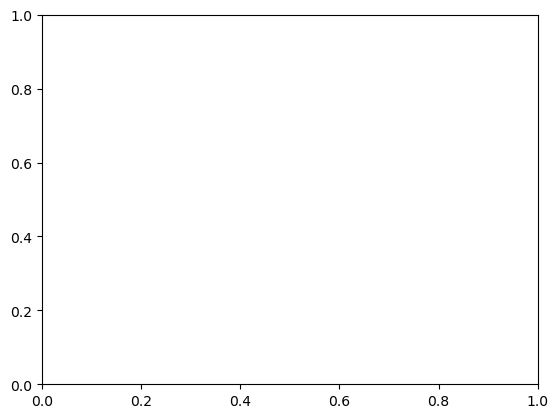

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
grid_size = 100  # Size of the grid
initial_infected = 100  # Initial number of infected individuals
infection_probability = 0.05  # Probability of infection from infected neighbor
recovery_probability = 0.01  # Probability of recovery for an infected individual
movement_probability = 0.1  # Probability of moving to an adjacent cell
arrival_rate = 0.01  # Arrival rate per step
departure_rate = 0.01  # Departure rate per step

# Grid codes
EMPTY = 0
SUSCEPTIBLE = 1
INFECTED = 2

# Initialize grid
np.random.seed(42)
grid = np.zeros((grid_size, grid_size), dtype=int)
# Populate the grid randomly with initial infected individuals
initial_infections = np.random.choice(range(grid_size*grid_size), initial_infected, replace=False)
grid.ravel()[initial_infections] = INFECTED
# Assume the rest are susceptible where not infected
grid[(grid == 0) & (np.random.rand(grid_size, grid_size) > (initial_infected / (grid_size * grid_size)))] = SUSCEPTIBLE

# Define neighborhood for local interactions and movement
neighbor_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def arrival(grid):
    empty_cells = np.argwhere(grid == EMPTY)
    if empty_cells.size > 0:
        new_agent_pos = empty_cells[np.random.randint(len(empty_cells))]
        grid[new_agent_pos[0], new_agent_pos[1]] = SUSCEPTIBLE

def departure(grid):
    occupied_cells = np.argwhere(grid != EMPTY)
    if occupied_cells.size > 0:
        leaving_agent_pos = occupied_cells[np.random.randint(len(occupied_cells))]
        grid[leaving_agent_pos[0], leaving_agent_pos[1]] = EMPTY

# Simulation step with arrivals and departures
def step(grid):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == INFECTED:
                # Attempt recovery
                if np.random.rand() < recovery_probability:
                    new_grid[i, j] = SUSCEPTIBLE
            elif grid[i, j] == SUSCEPTIBLE:
                # Check for infection
                for dx, dy in neighbor_offsets:
                    nx, ny = i + dx, j + dy
                    if 0 <= nx < grid_size and 0 <= ny < grid_size:
                        if grid[nx, ny] == INFECTED:
                            if np.random.rand() < infection_probability:
                                new_grid[i, j] = INFECTED
                                break
            
            # Movement
            if np.random.rand() < movement_probability:
                dx, dy = neighbor_offsets[np.random.randint(0, len(neighbor_offsets))]
                nx, ny = i + dx, j + dy
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    # Swap positions
                    new_grid[i, j], new_grid[nx, ny] = new_grid[nx, ny], new_grid[i, j]
    
    # Handle arrivals and departures at the end of each step
    if np.random.rand() < arrival_rate:
        arrival(new_grid)
    if np.random.rand() < departure_rate:
        departure(new_grid)

    return new_grid

# Visualization using matplotlib animation
fig, ax = plt.subplots()

def update(*args):
    global grid
    grid = step(grid)
    ax.clear()
    ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
    ax.axis('off')

ani = animation.FuncAnimation(fig, update, frames=200, interval=50)
plt.show()

In [3]:
ani.save('simulation.mp4', writer='ffmpeg')

MovieWriter stderr:
[libopenh264 @ 0x59d3523d82c0] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '20.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'simulation.mp4']' returned non-zero exit status 1.

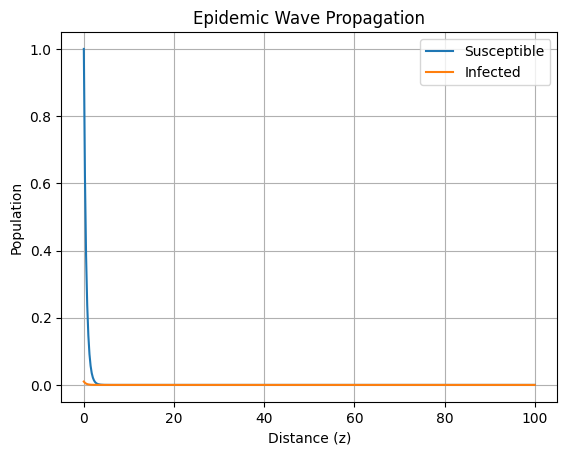

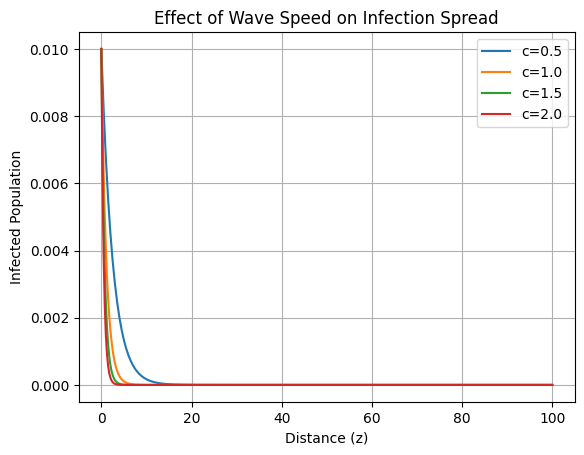

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE system (transformed from the PDE)
def sis_ode_system(z, y, beta, mu_S, mu_I, r, D_S, D_I, c):
    S, I = y
    dSdz = np.zeros_like(y)
    dSdz[0] = D_S * S - c*S + beta * S * I - mu_S * S + r * I  # ODE for S after transformation
    dSdz[1] = D_I * I - c*I + beta * S * I - (mu_I + r) * I   # ODE for I after transformation
    return dSdz

# Parameters
beta = 0.03  # Transmission rate
mu_S = 0.01  # Recovery/death rate for S
mu_I = 0.01  # Recovery/death rate for I
r = 0.005  # Recovery rate from I to S
D_S = 0.1  # Diffusion coefficient for S
D_I = 0.1  # Diffusion coefficient for I
c = 2.0  # Guess wave speed

# Domain
z = np.linspace(0, 100, 400)

# Initial conditions: start with a small infected population in a susceptible population
y0 = [1.0, 0.01]  # Initial condition [S0, I0]

# Solve the ODE
sol = solve_ivp(sis_ode_system, [z[0], z[-1]], y0, args=(beta, mu_S, mu_I, r, D_S, D_I, c), dense_output=True)

# Plot the results
z_fine = np.linspace(0, 100, 400)
y_fine = sol.sol(z_fine)
plt.plot(z_fine, y_fine.T)
plt.title('Epidemic Wave Propagation')
plt.xlabel('Distance (z)')
plt.ylabel('Population')
plt.legend(['Susceptible', 'Infected'])
plt.grid(True)
plt.show()

# Exploring wave speed dependencies
c_values = [0.5, 1.0, 1.5, 2.0]  # Different guesses for the wave speed
for c in c_values:
    sol = solve_ivp(sis_ode_system, [z[0], z[-1]], y0, args=(beta, mu_S, mu_I, r, D_S, D_I, c), dense_output=True)
    y_fine = sol.sol(z_fine)
    plt.plot(z_fine, y_fine[1], label=f'c={c}')  # Plotting only the infected population

plt.title('Effect of Wave Speed on Infection Spread')
plt.xlabel('Distance (z)')
plt.ylabel('Infected Population')
plt.legend()
plt.grid(True)
plt.show()


We define the ODE system derived from the SIS model after applying the concept of a traveling wave. This system is simplified and serves illustrative purposes.
We choose a set of initial conditions and parameters. In reality, these parameters should be adjusted based on the specific context of the epidemic and the population.
We solve the ODE using scipy.integrate.solve_ivp, which integrates a system of ODEs over a specified interval.
We plot the results, showing how the susceptible and infected populations vary over a spatial domain for a given wave speed.
Finally, we examine how varying the wave speed (c) affects the spread of the infection by plotting different scenarios.
Note: This illustrative example simplifies many aspects of epidemic modeling for pedagogical purposes. Real-world applications would require more detailed models, taking into account various factors not considered here.

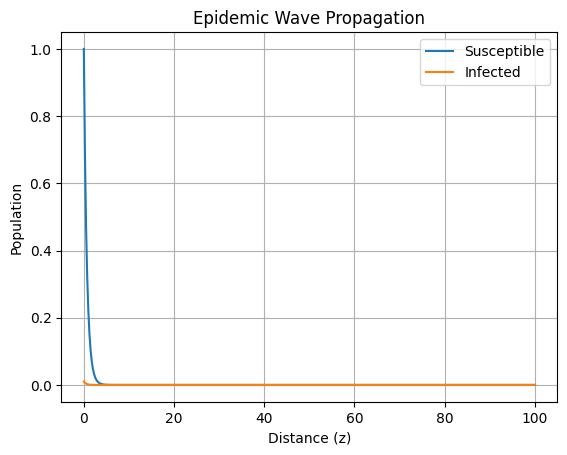

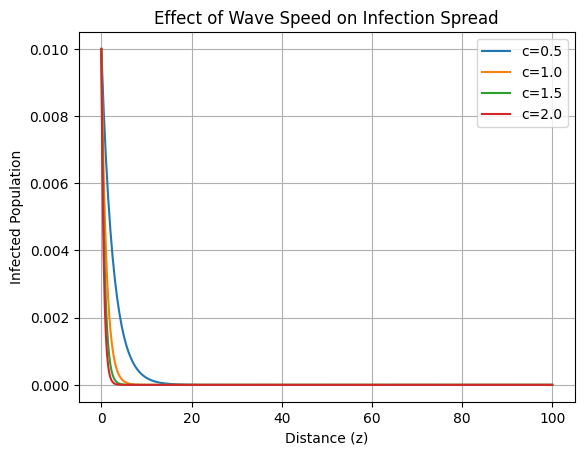

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sis_ode_system(z, y, beta, mu_S, mu_I, r, D_S, D_I, c):
    S, I = y
    dSdz = np.zeros_like(y)
    dSdz[0] = D_S * S - c*S + beta * S * I - mu_S * S + r * I
    dSdz[1] = D_I * I - c*I + beta * S * I - (mu_I + r) * I
    return dSdz

beta = 0.03
mu_S = 0.01
mu_I = 0.01
r = 0.005
D_S = 0.1
D_I = 0.1
c = 2.0

z = np.linspace(0, 100, 400)

y0 = [1.0, 0.01]

sol = solve_ivp(sis_ode_system, [z[0], z[-1]], y0, args=(beta, mu_S, mu_I, r, D_S, D_I, c), dense_output=True)

z_fine = np.linspace(0, 100, 400)
y_fine = sol.sol(z_fine)
plt.plot(z_fine, y_fine.T)
plt.title('Epidemic Wave Propagation')
plt.xlabel('Distance (z)')
plt.ylabel('Population')
plt.legend(['Susceptible', 'Infected'])
plt.grid(True)
plt.show()

c_values = [0.5, 1.0, 1.5, 2.0]
for c in c_values:
    sol = solve_ivp(sis_ode_system, [z[0], z[-1]], y0, args=(beta, mu_S, mu_I, r, D_S, D_I, c), dense_output=True)
    y_fine = sol.sol(z_fine)
    plt.plot(z_fine, y_fine[1], label=f'c={c}')

plt.title('Effect of Wave Speed on Infection Spread')
plt.xlabel('Distance (z)')
plt.ylabel('Infected Population')
plt.legend()
plt.grid(True)
plt.show()


Spatial Dynamics

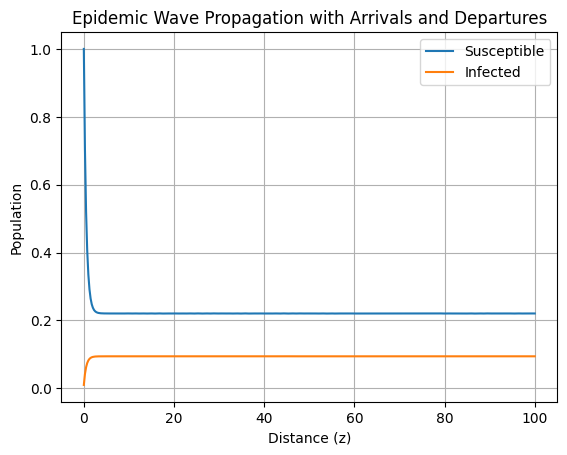

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def modified_sis_ode_system(z, y, beta, mu_S, mu_I, r, D_S, D_I, lambda_arrival, delta_departure, f_S, c):
    S, I = y
    lambda_S = lambda_arrival * f_S  # Arrival rate of susceptible individuals
    lambda_I = lambda_arrival * (1 - f_S)  # Arrival rate of infected individuals
    dSdz = D_S * S - c*S + beta * S * I - mu_S * S + r * I + lambda_S - delta_departure * S
    dIdz = D_I * I - c*I + beta * S * I - (mu_I + r) * I + lambda_I - delta_departure * I
    return [dSdz, dIdz]

# Define parameters for the modified system
beta = 0.03
mu_S = 0.01
mu_I = 0.01
r = 0.005
D_S = 0.1
D_I = 0.1
c = 2.0
lambda_arrival = 0.05  # Arrival rate
delta_departure = 0.02  # Departure rate
f_S = 0.7  # Fraction of arrivals that are susceptible

z = np.linspace(0, 100, 400)
y0 = [1.0, 0.01]  # Initial conditions

sol = solve_ivp(modified_sis_ode_system, [z[0], z[-1]], y0, args=(beta, mu_S, mu_I, r, D_S, D_I, lambda_arrival, delta_departure, f_S, c), dense_output=True)

z_fine = np.linspace(0, 100, 400)
y_fine = sol.sol(z_fine)
plt.plot(z_fine, y_fine.T)
plt.title('Epidemic Wave Propagation with Arrivals and Departures')
plt.xlabel('Distance (z)')
plt.ylabel('Population')
plt.legend(['Susceptible', 'Infected'])
plt.grid(True)
plt.show()